In [1]:
from omega_prime_visibility import get_visibility_df
import omega_prime
import shapely

In [2]:
r = omega_prime.Recording.from_file("highway_merge.mcap", compute_polygons=True)

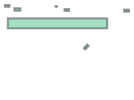

In [3]:
obstruction_poly = shapely.Polygon(
    [
        [-220, 10],
        [-120, 10],
        [-120, -0],
        [-220, -0],
    ]
)
shapely.GeometryCollection(list(r._df.filter(frame=0)["polygon"]) + [obstruction_poly])

In [4]:
df = get_visibility_df(r._df, ego_idx=0, static_occluder_polys=[obstruction_poly])

  0%|          | 0/433 [00:00<?, ?it/s]

In [5]:
!uv pip install altair

Using Python 3.12.10 environment at: /scenario-center-playground/.venv
Audited 1 package in 17.71s


In [6]:
import altair as alt

alt.Chart(df).mark_line().encode(
    alt.X("frame"), alt.Y("visibility"), alt.Color("idx:N"), tooltip=["idx", "visibility", "frame"]
).properties(title="Visibility of Objects from idx=0")

alt.Chart(...)